In [1]:
import numpy as np
import scipy
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
beta = np.matrix([1.0,0.0]).T
lam = 0.07

### Data points###

In [3]:
X_origin = [4,5,5.6,6.8,7,7.2,8,0.8,1,1.2,2.5,2.6,3,4.3]

### Corresponding classes###

In [4]:
Y_origin = [1,1,1,1,1,1,1,0,0,0,0,0,0,0]

### Process data###

In [5]:
X_origin = np.array(X_origin)
X_origin = (X_origin - np.mean(X_origin)) / X_origin.std()
X_origin = np.array([X_origin, np.ones(len(X_origin))]).T
Y_origin = np.matrix(Y_origin).T
X = X_origin
Y = Y_origin

#### helper functions####

In [6]:
def mu(X, beta):
    
    return (1 / (1 + np.exp(- X.dot(beta)))).reshape((X.shape[0], 1))
# def logistic(X,beta):
#     return lam * np.linalg.norm(beta) - np.dot(Y.T, np.log(mu(X, beta))) - np.dot((1 - Y).T, np.log(1-mu(X, beta)))
# def ridge(X, beta):
#     return lam * np.linalg.norm(beta) + 1/2 * np.norm(Y - np.dot(X, beta))
def newton_l(X, beta):
    cur_mu = mu(X,beta)
    gradient = 2*lam*beta - np.dot(X.T, Y - cur_mu)
    u = np.diag(np.diag(np.dot(cur_mu, (1-cur_mu).T)))
    
    hessian = 2*lam + np.dot(np.dot(X.T, u), X)
#     print(hessian.shape)
    return -np.dot(np.linalg.inv(hessian), gradient)
    
def newton_j(X, beta):
    gradient = 2*lam*beta - np.dot(X.T, (Y - np.dot(X, beta)))
    hessian = 2*lam + np.dot(X.T, X)
    return -np.dot(np.linalg.inv(hessian), gradient)

In [7]:
b_l = beta
b_j = beta
for i in range(3):
    b_l = b_l + newton_l(X, b_l)
    b_j = b_j + newton_j(X, b_j)
# print(b_j)

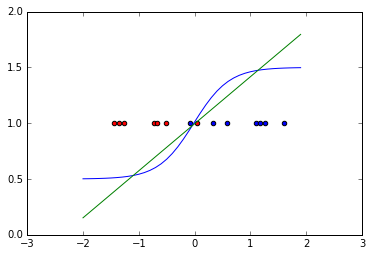

In [8]:
plt.scatter(X[:,0][:7], X[:,1][:7]) 
plt.scatter(X[:,0][7:], X[:,1][7:], c="red") 
a = np.arange(-2, 2, 0.1)
A = np.array([a, np.ones((len(a)))])
A = A.T
plt.plot(a, mu(A, b_l)+0.5) 
plt.plot(a, A.dot(b_j) + 0.5)
plt.show()

Green line shows the linear regression result and the blue curve shows the logistic regression result

## INSERT DATA POINT(3,1)##

In [9]:
X = np.insert(X, 0, np.array([3, 1]), axis=0)
Y = np.insert(Y, 0, 1).T

In [10]:
b_l = beta
b_j = beta
for i in range(3):
    b_l = b_l + newton_l(X, b_l)
    b_j = b_j + newton_j(X, b_j)
    

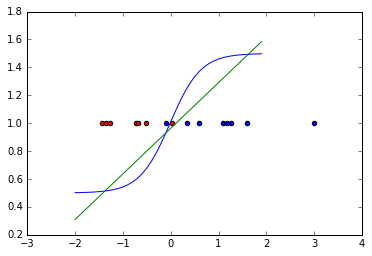

In [11]:
plt.scatter(X[:,0][:8], X[:,1][:8]) 
plt.scatter(X[:,0][8:], X[:,1][8:], c="red") 
a = np.arange(-2, 2, 0.1)
A = np.array([a, np.ones((len(a)))])
A = A.T
plt.plot(a, mu(A, b_l)+0.5) 
plt.plot(a, A.dot(b_j) + 0.5)
plt.show()

Green line shows the linear regression result and the blue curve shows the logistic regression result